<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Retrain-Nothing-plots" data-toc-modified-id="Retrain-Nothing-plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Retrain Nothing plots</a></span></li><li><span><a href="#DRIFT---VIOLIN-PLOT" data-toc-modified-id="DRIFT---VIOLIN-PLOT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DRIFT - VIOLIN PLOT</a></span><ul class="toc-item"><li><span><a href="#Best-case-scenario-(smooth_drift_sabilized_noisy)" data-toc-modified-id="Best-case-scenario-(smooth_drift_sabilized_noisy)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Best case scenario (smooth_drift_sabilized_noisy)</a></span></li><li><span><a href="#worst-case-scenario(covar_x_drift_stabilized)" data-toc-modified-id="worst-case-scenario(covar_x_drift_stabilized)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>worst case scenario(covar_x_drift_stabilized)</a></span></li></ul></li><li><span><a href="#TAbleau-comparaison-all-drifts" data-toc-modified-id="TAbleau-comparaison-all-drifts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TAbleau comparaison all drifts</a></span><ul class="toc-item"><li><span><a href="#Stats-detections" data-toc-modified-id="Stats-detections-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stats detections</a></span></li></ul></li><li><span><a href="#IMPACT-OF-NOISE" data-toc-modified-id="IMPACT-OF-NOISE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>IMPACT OF NOISE</a></span><ul class="toc-item"><li><span><a href="#Noise-proper" data-toc-modified-id="Noise-proper-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Noise proper</a></span></li></ul></li><li><span><a href="#IMPACT-OF-ADWIN-$\delta$-parameter" data-toc-modified-id="IMPACT-OF-ADWIN-$\delta$-parameter-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>IMPACT OF ADWIN $\delta$ parameter</a></span></li><li><span><a href="#IMPACT-of-BACKGROUND-choice" data-toc-modified-id="IMPACT-of-BACKGROUND-choice-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>IMPACT of BACKGROUND choice</a></span><ul class="toc-item"><li><span><a href="#BEST-VS-WORSE" data-toc-modified-id="BEST-VS-WORSE-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>BEST VS WORSE</a></span></li><li><span><a href="#Scatter" data-toc-modified-id="Scatter-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Scatter</a></span></li><li><span><a href="#Deciles" data-toc-modified-id="Deciles-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Deciles</a></span></li><li><span><a href="#TEST" data-toc-modified-id="TEST-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>TEST</a></span></li></ul></li></ul></div>

In [1]:
import shap

In [2]:
from drift_generators import *

In [3]:
my_path = "/home/xxxxxxxxxxx/Documents/paper/paper/"

# Retrain Nothing plots 
Display the inability of models to learn those datasets perfectly

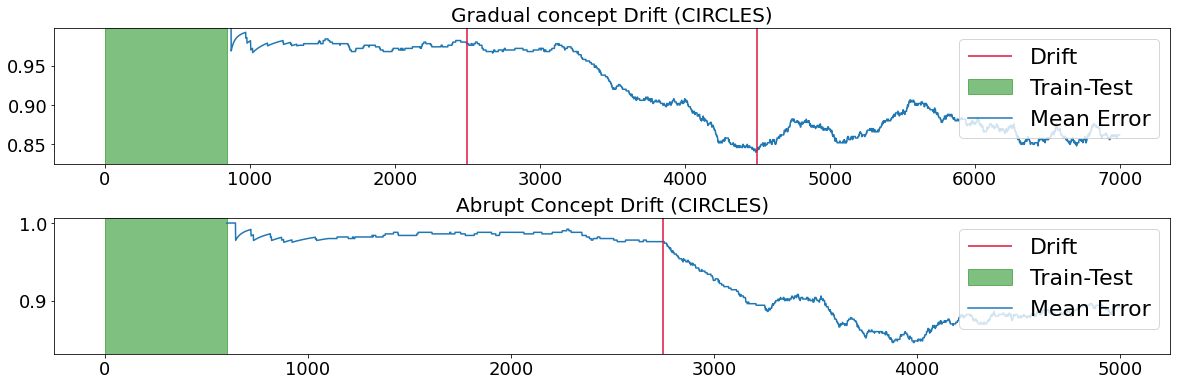

In [4]:
drift_type = ['back_and_forth_abrupt_drift',
 'back_and_forth_smooth_drift']
fontsize = 20
n = 5   #  number of added a la mano
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = [20,3*(2)])

    
i=0
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
D_G.retrain_nothing()
D_G.drift_points = D_G.drift_points[:-1]
D_G.plot_retrain(ax=ax[i])
ax[i].set_title("Gradual concept Drift (CIRCLES)",fontsize=fontsize)

#load smooth concept
i=1
D_G = Drift_generators(n_samples = int(5000), n_features = 3)
D_G.brutal_concept_drift(n_drift=1, circle_centers=[[0.7 for i in range(D_G.n_features)]])
D_G.retrain_nothing()
D_G.plot_retrain(ax = ax[i])
ax[i].set_title("Abrupt Concept Drift (CIRCLES)",fontsize=fontsize)

for i in range(len(ax)):
    #ax[i].set_xticks([])
    ax[i].tick_params(axis='both', which='major', labelsize=18)
    
    handles, labels = ax[i].get_legend_handles_labels()
    
    by_label = dict(zip(labels, handles))

    by_label["Drift"] = by_label.pop("drift")
    by_label["Train-Test"] = by_label.pop("train-test")
    by_label["Mean Error"] = by_label.pop("Mean error")
    
    ax[i].legend(by_label.values(), by_label.keys(), fontsize = 22, loc='upper right')
    #
plt.subplots_adjust(hspace=0.4)
#plt.savefig(my_path + 'figures/retrain_nothing.png', bbox_inches='tight')
plt.show()

FixedFormatter should only be used together with FixedLocator


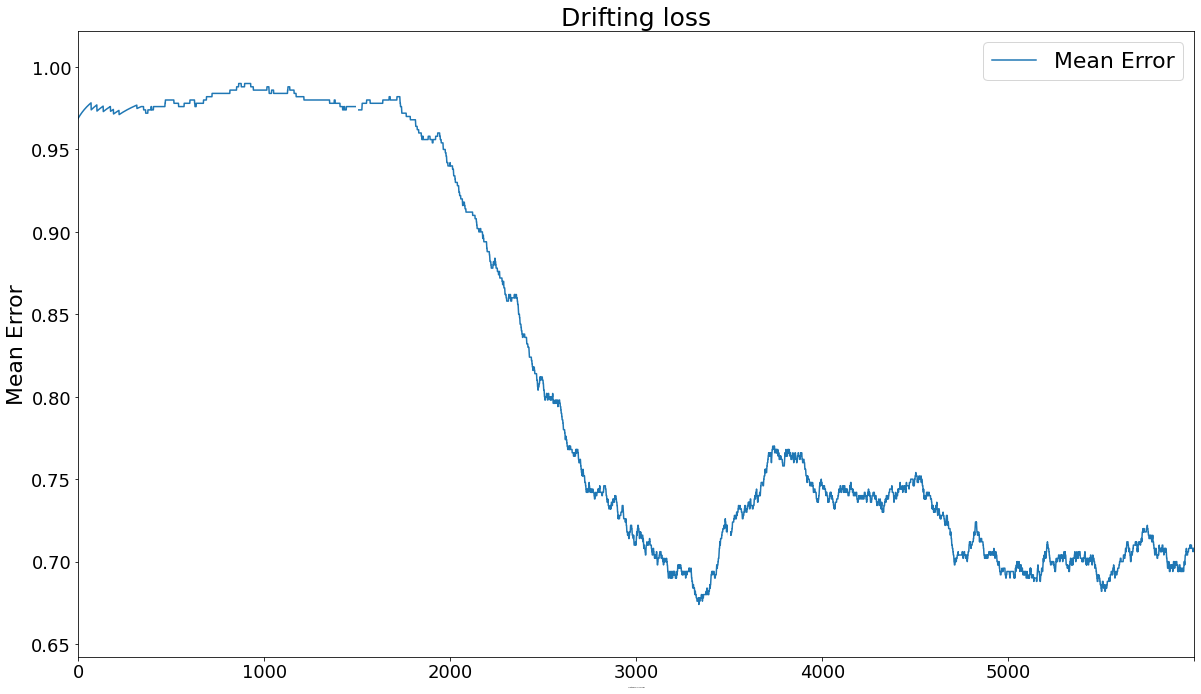

In [59]:
drift_type = ['back_and_forth_abrupt_drift',
 'back_and_forth_smooth_drift']
fontsize = 20
n = 5   #  number of added a la mano
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [20,11.5])

    
i=0
D_G = Drift_generators(n_samples = int(7000), n_features = 2)
circle_centers = [[0.1 for i in range(D_G.n_features)],[0.1 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
D_G.retrain_nothing()
D_G.drift_points = D_G.drift_points[:-1]
#D_G.retrain_adwin()

D_G.plot_retrain(ax=ax)


ax.set_title("Drifting loss",fontsize=25)


#ax[i].set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=18)


ymin, ymax = ax.get_ylim()
#ax.vlines(x= 3146, ymin=ymin, ymax=ymax, color='orange', label ='Adwin Detection')

ax.vlines(x= 2500, linewidth =2, ymin=ymin, ymax=ymax, color='white')
ax.vlines(x= 4500, linewidth =2, ymin=ymin, ymax=ymax, color='white')



handles, labels = ax.get_legend_handles_labels()

by_label = dict(zip(labels, handles))

by_label.pop("drift")
by_label.pop("train-test")
by_label["Mean Error"] = by_label.pop("Mean error")
ax.set_xlim(1000, 7000)
ax.set_xticklabels(np.arange(0,6000,1000))

ax.set_ylabel("Mean Error", fontsize = 22)
ax.set_xlabel("Instance number", fontsize = 2)
ax.legend(by_label.values(), by_label.keys(), fontsize = 22, loc='upper right')
    #
plt.subplots_adjust(hspace=0.4)
#plt.savefig(my_path + 'figures/retrain_nothing.png', bbox_inches='tight')
plt.show()

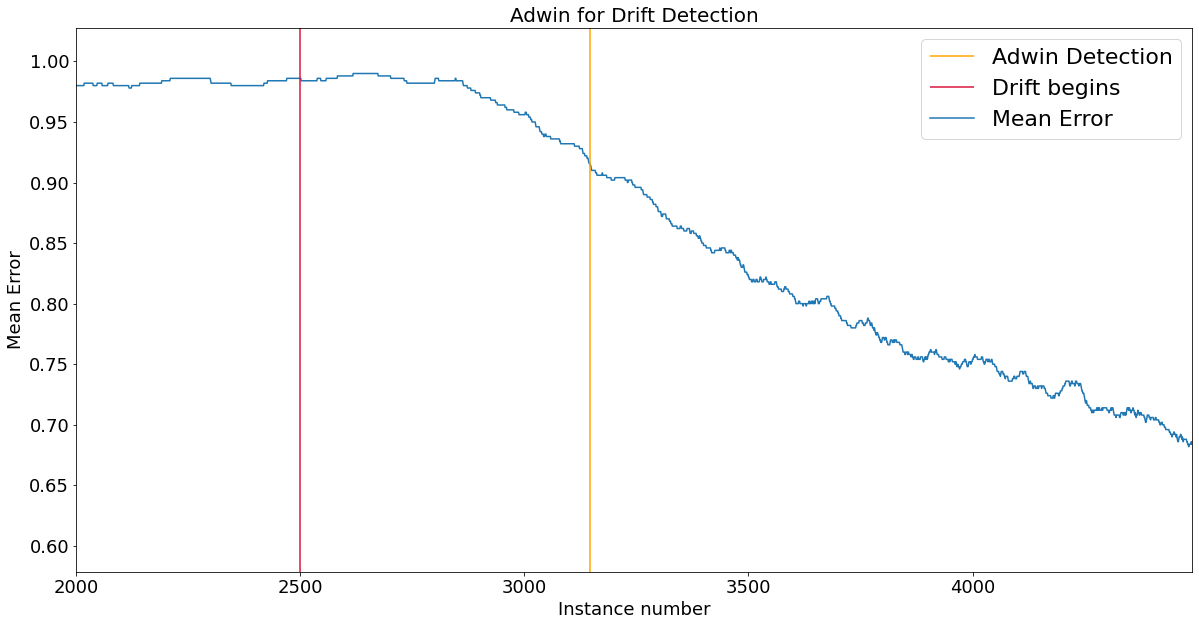

In [43]:
drift_type = ['back_and_forth_abrupt_drift',
 'back_and_forth_smooth_drift']
fontsize = 20
n = 5   #  number of added a la mano
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [20,10])

    
i=0
D_G = Drift_generators(n_samples = int(7000), n_features = 2)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
D_G.retrain_nothing()
D_G.drift_points = D_G.drift_points[:-1]
#D_G.retrain_adwin()

D_G.plot_retrain(ax=ax)


ax.set_title("Adwin for Drift Detection",fontsize=fontsize)


#ax[i].set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=18)


ymin, ymax = ax.get_ylim()
ax.vlines(x= 3146, ymin=ymin, ymax=ymax, color='orange', label ='Adwin Detection')

handles, labels = ax.get_legend_handles_labels()

by_label = dict(zip(labels, handles))

by_label["Drift begins"] = by_label.pop("drift")
by_label.pop("train-test")
by_label["Mean Error"] = by_label.pop("Mean error")
ax.set_xlim(2000, 4490)

ax.set_ylabel("Mean Error", fontsize = 18)
ax.set_xlabel("Instance number", fontsize = 18)
ax.legend(by_label.values(), by_label.keys(), fontsize = 22, loc='upper right')
    #
plt.subplots_adjust(hspace=0.4)
#plt.savefig(my_path + 'figures/retrain_nothing.png', bbox_inches='tight')
plt.show()

# DRIFT - VIOLIN PLOT 


## Best case scenario (smooth_drift_sabilized_noisy)


In [ ]:
from drift_generators import *

In [ ]:
funcs= ['retrain_shap_adwin',
         'retrain_adwin_loss']

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7]+[0.4 for i in range(1,D_G.n_features)]]
D_G.brutal_concept_drift(n_drift = 1, circle_centers = circle_centers, drift_points=[2500])

error_list, detections = D_G.load_data(funcs, dataset = "concept_x_abrupt_stab", n_load = 100)
#D_G.drift_points = D_G.drift_points[0]

In [ ]:
%%time
error_means_list, drift_points, detecs, stats_detections, freq_detections = D_G.pre_compute_plot(error_list, detections, funcs, w_size = 500)

In [ ]:
plt.subplots(1,1,figsize = [15,10])
plt.show()

In [ ]:
#Two above plots combined
funcs = funcs
look_funcs = funcs
drift_points = drift_points
stats_detections = stats_detections
freq_detections = freq_detections
detecs = detecs
ax = None
    
#filter elts we need and order results
i_selected = [funcs.index(x) for x in look_funcs if x in funcs]
fcts = np.array(funcs)[i_selected]
stats = np.array(stats_detections)[i_selected]
#first order funcs by mean detec - can represent the function rank
o_funcs = [x[0] for x in sorted(
    [(func, stats[i][1][0]) for i, func in enumerate(fcts)]
            ,key= lambda x:x[1], reverse = True)]
i_ordered = [list(fcts).index(x) for x in o_funcs if x in fcts]
stats = np.array(stats)[i_ordered]
freq_detec_ordered = np.array(freq_detections)[i_selected][i_ordered]
o_detecs = np.array(detecs,dtype='object')[i_selected][i_ordered]

ax_sizes = [sum([len(x)>0 for x in o_detecs[:,i]]) for i in range(np.shape(o_detecs)[1])]
ax_sizes = [x+1 if x==0 else x for x in ax_sizes]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, 
                    figsize = [20,sum(ax_sizes)*0.85])

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
if(len(funcs)>8):
    colors = [[x for x in colors][i%len(colors)] for i in range(len(funcs))]

ymin_max = [(i)/len(fcts) for i in range(len(fcts)+1)]

for d, d_p in enumerate(drift_points[:-2]):
    ax.vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

for d, d_p in enumerate(drift_points[:-1]):

    index_detecs = [i for i,x in enumerate(freq_detec_ordered[:,d]) if x>0]

    if(len(index_detecs)>0):
        func_detecs = o_detecs[index_detecs,d]

        violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)],
                               points = 1000)
        for i, (ind, func, v) in enumerate(zip(index_detecs, np.array(o_funcs)[index_detecs], violins['bodies'])):
            v.set_fc(c = colors[ind+4])
            if(freq_detec_ordered[i][d] < 0.98):
                v.set_alpha(0.33)
            else:
                v.set_alpha(1)        

            if('shap' in func):
                name = 'Shap-ADWIN'
            else:
                name = 'ADWIN'
            ax.plot([],[],color = colors[ind+4],
            label = "%.2f: %s | + %d"%(freq_detec_ordered[ind,d],
                        name, violins['cmedians'].get_segments()[i][0][0]- drift_points[d]))


        violins['cmaxes'].set_edgecolor('black')
        violins['cmins'].set_edgecolor('black')
        violins['cmedians'].set_edgecolor('black')
        
detections = np.array(detections, dtype='object')
ymin, ymax = ax.get_ylim()
for k in range(np.shape(detections)[0]):
    for d in detections[k, 0]:
        ax.vlines(ymin=0.5, ymax=1, x = d, color = 'orange',alpha = 1, label="Detection",zorder =-1)
    for d in detections[k, 1]:
        ax.vlines(ymin=0, ymax=0.5, x = d, color = 'orange',alpha = 1, label="Detection",zorder =-1)

ax.plot([],[],color = 'white',label=" freq: Method | Median Detec")#      | delta | median detec")

        
#for d in range(len(drift_points[:-1])):
d = 1
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(reversed(labels), reversed(handles)))
#print(by_label.keys())
#print(list(by_label.keys())[-1])

by_label["Drift point"] = by_label.pop("drift point")
del by_label[list(by_label.keys())[-1]]
ax.legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')

interval = drift_points[d+1]-drift_points[d]
ax.set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.9)
ax.set_ylim(ymin=0,ymax=1)

    
    
    
ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=18)

#ax.set_title(10*" "+"Detection Distribution", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)

plt.subplots_adjust(hspace=1.2)

#plt.savefig(my_path + 'figures/best_violin.png', bbox_inches='tight')

plt.savefig("/home/xxxxxxxx/figures/best_violin.png", bbox_inches='tight')
plt.show()

## worst case scenario(covar_x_drift_stabilized)

In [ ]:
funcs= ['retrain_shap_adwin',
         'retrain_adwin_loss']

In [ ]:
D_G = Drift_generators(n_samples = int(6000), n_features = 3)
d_centers = [(0, 0, 0.4, 0.25, 1),(0, 0.4, 1, 0, 0.25),
            (1, 0, 0.4, 0.25, 1),(1, 0.4, 1, 0, 0.25),
            (2, 0, 0.4, 0.25, 1),(2, 0.4, 1, 0, 0.25),]
D_G.brutal_covariate_drift(d_centers=d_centers)

error_list, detections = D_G.load_data(funcs, dataset = "covar_xyz_drift_stabilized", n_load = 100)

In [2]:
%%time
error_means_list, drift_points, detecs, stats_detections, freq_detections = D_G.pre_compute_plot(error_list, detections, funcs, w_size = 500)

NameError: name 'D_G' is not defined

In [3]:
funcs = funcs
look_funcs = funcs
drift_points = drift_points
stats_detections = stats_detections
freq_detections = freq_detections
detecs = detecs
ax = None
    
#filter elts we need and order results
i_selected = [funcs.index(x) for x in look_funcs if x in funcs]
fcts = np.array(funcs)[i_selected]
stats = np.array(stats_detections)[i_selected]
#first order funcs by mean detec - can represent the function rank
o_funcs = [x[0] for x in sorted(
    [(func, stats[i][1][0]) for i, func in enumerate(fcts)]
            ,key= lambda x:x[1], reverse = True)]
i_ordered = [list(fcts).index(x) for x in o_funcs if x in fcts]
stats = np.array(stats)[i_ordered]
freq_detec_ordered = np.array(freq_detections)[i_selected][i_ordered]
o_detecs = np.array(detecs,dtype='object')[i_selected][i_ordered]

ax_sizes = [sum([len(x)>0 for x in o_detecs[:,i]]) for i in range(np.shape(o_detecs)[1])]
ax_sizes = [x+1 if x==0 else x for x in ax_sizes]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, 
                    figsize = [20,sum(ax_sizes)*0.85])

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
if(len(funcs)>8):
    colors = [[x for x in colors][i%len(colors)] for i in range(len(funcs))]

ymin_max = [(i)/len(fcts) for i in range(len(fcts)+1)]

for d, d_p in enumerate(drift_points[:-1]):
    ax.vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

for d, d_p in enumerate(drift_points[:-1]):

    index_detecs = [i for i,x in enumerate(freq_detec_ordered[:,d]) if x>0]

    if(len(index_detecs)>0):
        func_detecs = o_detecs[index_detecs,d]

        violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)],
                               points = 1000)
        for i, (ind, func, v) in enumerate(zip(index_detecs, np.array(o_funcs)[index_detecs], violins['bodies'])):
            v.set_fc(c = colors[ind+4])
            if(freq_detec_ordered[i][d] < 0.98):
                v.set_alpha(0.33)
            else:
                v.set_alpha(1)
            
            
            if('shap' in func):
                name = 'Shap-ADWIN'
            else:
                name = 'ADWIN         '
            ax.plot([],[],color = colors[ind+4],
            label = "%.2f: %s | + %d"%(freq_detec_ordered[ind,d],
                        name, violins['cmedians'].get_segments()[i][0][0]- drift_points[d]))


        violins['cmaxes'].set_edgecolor('black')
        violins['cmins'].set_edgecolor('black')
        violins['cmedians'].set_edgecolor('black')
        #print(violins)
        #for col, x in enumerate(violins['bodies']):
        #    x.set_facecolor(colors[4+col])

detections = np.array(detections,dtype='object')
ymin, ymax = ax.get_ylim()
for k in range(np.shape(detections)[0]):
    for d in detections[k, 1]:
        ax.vlines(ymin=0.5, ymax=1, x = d, color = 'orange',alpha = 1, label="Detection", zorder=-1)
    for d in detections[k, 0]:
        ax.vlines(ymin=0, ymax=0.5, x = d, color = 'orange',alpha = 1, label="Detection", zorder=-1)

ax.plot([],[],color = 'white',label=" freq: Method         | Median Detection")#      | delta | median detec")

        

        
for d in range(len(drift_points[:-1])):
    handles, labels = ax.get_legend_handles_labels()
   
    by_label = dict(zip(reversed(labels), reversed(handles)))
    ax.legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')
    
    interval = drift_points[d+1]-drift_points[d]
    #ax.set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/2.2)
    ax.set_xlim(xmin = 1660, xmax = 2030)
    ax.set_ylim(ymin=0,ymax=1)

ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=18)

#ax.set_title(10*" "+"True detection (ZOOM)", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)

plt.subplots_adjust(hspace=1.2)


plt.savefig("/home/xxxxxxxx/figures/worse_violin.png", bbox_inches='tight')
#plt.savefig(my_path + 'figures/worse_violin.png', bbox_inches='tight')
plt.show()

NameError: name 'funcs' is not defined

# TAbleau comparaison all drifts

## Stats detections

In [ ]:
from drift_generators import *

In [ ]:
def get_drift_DG(drift_name):#get proper dataset with dataset name
    if(drift_name == "covar_x_drift_stabilized"):
        D_G = Drift_generators(n_samples = int(6000), n_features = 3)
        d_centers = [(0, 0, 0.4, 0.25, 1),(0, 0.4, 1, 0, 0.25)]
        D_G.brutal_covariate_drift(d_centers=d_centers)
    elif(drift_name == "smooth_x_drift_sabilized"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7]+[0.4 for i in range(1,D_G.n_features)], 
                          [0.7]+[0.4 for i in range(1,D_G.n_features)]]
        D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
        D_G.drift_points = [D_G.drift_points[0]]
    elif(drift_name == "concept_x_abrupt_stab"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7]+[0.4 for i in range(1,D_G.n_features)]]
        D_G.brutal_concept_drift(n_drift = 1, circle_centers = circle_centers, drift_points=[2500])
    elif(drift_name == "covar_xyz_drift_stabilized"):
        D_G = Drift_generators(n_samples = int(6000), n_features = 3)
        d_centers = [(0, 0, 0.4, 0.25, 1),(0, 0.4, 1, 0, 0.25),
                    (1, 0, 0.4, 0.25, 1),(1, 0.4, 1, 0, 0.25),
                    (2, 0, 0.4, 0.25, 1),(2, 0.4, 1, 0, 0.25),]
        D_G.brutal_covariate_drift(d_centers=d_centers)
    elif(drift_name == "concept_abrupt_stab"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7 for i in range(D_G.n_features)]]
        D_G.brutal_concept_drift(n_drift = 1, circle_centers = circle_centers, drift_points=[2500])
    elif(drift_name == "smooth_drift_sabilized"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
        D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
        D_G.drift_points = [D_G.drift_points[0]]
    
    #Synthetic
    elif(drift_name == "sine1_short_single"):
        D_G = Drift_generators()
        D_G.load_df("sine1_short")
        D_G.df = D_G.df.iloc[:4000]
        D_G.drift_points = D_G.drift_points [:-1]
        D_G.n = 4000
    elif(drift_name == "sine2_short_single"):
        D_G = Drift_generators()
        D_G.load_df("sine2_short")
        D_G.df = D_G.df.iloc[:4000]
        D_G.drift_points = D_G.drift_points [:-1]
        D_G.n = 4000
    elif(drift_name == "stagger_short_single"):
        D_G = Drift_generators()
        D_G.load_df("stagger_short")
        D_G.df = D_G.df.iloc[:4000]
        D_G.drift_points = D_G.drift_points [:-1]
        D_G.n = 4000
    
    #SAME BUT WITH NOISE
    elif(drift_name == "covar_x_drift_stabilized_noisy"):
        D_G = Drift_generators(n_samples = int(6000), n_features = 3)
        d_centers = [(0, 0, 0.4, 0.25, 1),(0, 0.4, 1, 0, 0.25)]
        D_G.brutal_covariate_drift(d_centers=d_centers)
        D_G.add_noise()
    elif(drift_name == "smooth_x_drift_sabilized_noisy"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7]+[0.4 for i in range(1,D_G.n_features)], 
                          [0.7]+[0.4 for i in range(1,D_G.n_features)]]
        D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
        D_G.drift_points = [D_G.drift_points[0]]
        D_G.add_noise()
    elif(drift_name == "concept_x_abrupt_stab_noisy"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7]+[0.4 for i in range(1,D_G.n_features)]]
        D_G.brutal_concept_drift(n_drift = 1, circle_centers = circle_centers, drift_points=[2500])
        D_G.add_noise()
    elif(drift_name == "covar_xyz_drift_stabilized_noisy"):
        D_G = Drift_generators(n_samples = int(6000), n_features = 3)
        d_centers = [(0, 0, 0.4, 0.25, 1),(0, 0.4, 1, 0, 0.25),
                    (1, 0, 0.4, 0.25, 1),(1, 0.4, 1, 0, 0.25),
                    (2, 0, 0.4, 0.25, 1),(2, 0.4, 1, 0, 0.25),]
        D_G.brutal_covariate_drift(d_centers=d_centers)
        D_G.add_noise()
    elif(drift_name == "concept_abrupt_stab_noisy"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7 for i in range(D_G.n_features)]]
        D_G.brutal_concept_drift(n_drift = 1, circle_centers = circle_centers, drift_points=[2500])
        D_G.add_noise()
    elif(drift_name == "smooth_drift_sabilized_noisy"):
        D_G = Drift_generators(n_samples = int(7000), n_features = 3)
        circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
        D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
        D_G.drift_points = [D_G.drift_points[0]]
        D_G.add_noise()
        
    else:
        if(drift_name not in ["smooth_x_drift_sabilized", "concept_x_abrupt_stab", "covar_xyz_drift_stabilized",
"concept_abrupt_stab","smooth_drift_sabilized","covar_x_drift_stabilized"]):
            print("ok NAME NOTE RECOGNIZED")
        else:
            print("fckery happening")
        print("name not recognized")
    return(D_G)


    
def get_first_detecs(funcs, detections, drift_points):
    """ 
        only look at the first detections
        We do not take into account redudant detections
        
    """
    
    
    detecs = np.array(detections,dtype=object)
    all_first_detecs = []
    #number of iterations
    here=False
    for n in range(np.shape(detecs)[0]):
        #number of funcs
        detec_funcs = []
        for i in range(len(funcs)):#funcs
            first_detect = [[] for i in range(len(drift_points)-1)]
            for x in detecs[n,i]:
                temp = list(drift_points)
                temp.append(x)
                temp = sorted(temp)
                d_zone = temp.index(x)-1
                if(len(first_detect[d_zone])<1):
                    first_detect[d_zone].append(x)
                
            detec_funcs.append(first_detect)
            
        all_first_detecs.append(detec_funcs)
    all_first_detecs = np.array(all_first_detecs, dtype=object)
    return(all_first_detecs)

In [ ]:

all_drift_type = ["smooth_x_drift_sabilized", "concept_x_abrupt_stab", "covar_xyz_drift_stabilized",
"concept_abrupt_stab","smooth_drift_sabilized","covar_x_drift_stabilized"]
#synths
all_drift_type = all_drift_type + ["stagger_short_single","sine1_short_single","sine2_short_single"]
#all_drift_type = all_drift_type +[x+"_noisy" for x in all_drift_type]

funcs = ["retrain_shap_adwin","retrain_adwin_loss"]

all_drift_type

In [ ]:
results = []
all_drift_type = ["smooth_x_drift_sabilized", "concept_x_abrupt_stab", "covar_xyz_drift_stabilized",
"concept_abrupt_stab","smooth_drift_sabilized","covar_x_drift_stabilized"]+["stagger_short_single","sine1_short_single","sine2_short_single"]

#THIS LINE INCLUDES NOISY APPROACHES. 
#all_drift_type = all_drift_type +[x+"_noisy" for x in all_drift_type[3:4]]
df_results = pd.DataFrame(columns = ["freq_false", "freq_true",
                                     "mini", "mean", "std", "maxi", "median"])
print(all_drift_type)

for dataset in all_drift_type:
    print(dataset)
    D_G = get_drift_DG(str(dataset));
    error_list, detections = D_G.load_data(funcs, dataset = dataset, n_load = 100);
#    drift_points = D_G.drift_points

    drift_points = np.unique([0]+[x- D_G.n_seen() for x in D_G.drift_points]+[D_G.n-D_G.n_train-D_G.n_test])
    drift_points = [x for x in drift_points if 0<=x<=D_G.n-D_G.n_seen()]
    
    all_first_detecs = get_first_detecs(funcs, detections, drift_points)
    
    for i, func in enumerate(funcs):
        #print(func)
        detec_func = all_first_detecs[:,i]

        freq_false = len([x for x in detec_func[:,0] if len(x)>0])/len(detec_func)

        true_detecs = [x for x in detec_func[:,1] if len(x)>0]


        freq_true = len(true_detecs)/len(detec_func)
        mean = int(np.mean(true_detecs))
        maxi = int(np.max(true_detecs))
        mini = int(np.min(true_detecs))
        median = int(np.median(true_detecs))
        std = np.std(true_detecs)

        #print("    ",freq_false, freq_true, mini, mean, maxi, median)
        name = dataset + "__"+func[8:]
        df_results.loc[name] = [freq_false, freq_true, mini, mean, std, maxi, median]


df_results = df_results.astype({"freq_false":'float', "freq_true":'float',
                                "mini":'int',"mean":'int',
                  "std":'float',"maxi":"int","median":'int'})

for i in range(0,len(df_results),2):
    print(df_results.iloc[i].name[:-12])
    res = df_results.iloc[i:i+2].sort_values(["median","mean","std"]).sort_values("freq_true", ascending=False)
    
    res.index=[x[-10:] for x in res.index]
    
    if("shap" in res.index[0]):  res.index = ["SHAP", "ADWIN"]
    else: res.index = ["ADWIN", "SHAP"]
    res.columns = ["F_P","T_P", "Min","Mean","STD","Max","Median"]
    #print(res.head(2))
    print()
    res.to_latex(my_path+ "tables/"+str(df_results.iloc[i].name[:-12]+".tex"),
                header=False,index_names=True, bold_rows=True)
    path = my_path+ "/tables/"+str(df_results.iloc[i].name[:-12])+".tex"
    
    latex_code = res.to_latex(index=False, index_names=True, bold_rows=True, 
                              formatters={"STD":lambda x:"%.2f"%x,
                                         "F_P": lambda x: "%.3f"%x,
                                         "T_P": lambda x: "%.3f"%x})
    latex_code = latex_code.replace("\\\n", "\\ \hline\n")
    
    latex_code = latex_code[latex_code.index("Median ")+25:latex_code.index("bottomrule")-2]

    n=6
    latex_code = "\n \\textit{"+ df_results.iloc[i].name[:-12].replace("_"," ") +"} & \\textbf{"+res.index[0]+"} & "+\
                latex_code[1:latex_code.index("hline")-1]+"\cline{2-9} {} & "+res.index[1]+ " & "+\
                latex_code[latex_code.index("hline")+n:]+"\hline"
    print(latex_code)
    with open(path, "w") as text_file:
        text_file.write(latex_code)
    

In [ ]:
results = df_results.astype({"freq_false":'float', "freq_true":'float',
                                "mini":'int',"mean":'int',
                  "std":'int',"maxi":"int","median":'int'}, copy=True)

table_latex = ""

for i in range(0,len(df_results),2):
    print(df_results.iloc[i].name[:-12])
    res = results.iloc[i:i+2].copy()
    res.index=[x[-10:] for x in res.index]
    
    if("shap" in res.index[0]):  res.index = ["SHAP", "ADWIN"]
    else: res.index = ["ADWIN", "SHAP"]
    
        
    res.columns = ["F_P","T_P", "Min","Mean","STD","Max","Median"]
    
    
    better_method = res.sort_values(["Mean","Median","STD"]).index[0]
    #print(res.sort_values(["Mean","Median","STD"]).index)
    
    
    dtypes = res.dtypes
    res.loc["ADWIN"] = res.loc["ADWIN"]-res.loc["SHAP"]    
    res = res.astype(dtypes)
    
    for k,x in enumerate(res.loc["ADWIN"].values):
        if(x == 0):
            res.loc["ADWIN"].values[k]= "0"
        
    #res = res.round({"STD":2})
    #res.loc[:,"STD"] = res.loc[:,"STD"].round(float)
    
    res.loc["ADWIN",["F_P","T_P","STD"]] = \
            ["%.2f"%x if x<0 else "%.2f"%x for x in res.loc["ADWIN",["F_P","T_P","STD"]].values]
    res.loc["ADWIN",["Min","Mean","Max","Median"]] = \
            ["%.2f"%x if x<0 else "%.2f"%x for x in res.loc["ADWIN",["Min","Mean","Max","Median"]].values]
    
    for k,x in enumerate(res.loc["ADWIN"].values):
        #+++
        if(float(x) > 0):
            if(k !=1):
                res.loc["ADWIN"].values[k] =  "\textcolor{red}{+"+str(x)+"}"
            else:
                res.loc["ADWIN"].values[k] =  "\textcolor{green}{+"+str(x)+"}"
        if(float(x) < 0):
            if(k != 1):
                res.loc["ADWIN"].values[k] =  "\textcolor{green}{"+str(x)+"}"
            else:
                res.loc["ADWIN"].values[k] =  "\textcolor{red}{"+str(x)+"}"
        if(x == 0):
            res.loc["ADWIN"].values[k]= "0"
    
    
    latex_code = res.to_latex(index=False, index_names=True, bold_rows=True, 
                             )#formatters={"STD":lambda x: x if float(x)!=0 else "0",#"%.1f"%x if type(x)!=str else  x.split(".")[0]+x.split(".")[1][:1] ,
                              #           "F_P": lambda x: x if float(x)!=0 else "0",#"%.3f"%x if type(x)!=str else x.split(".")[0]+x.split(".")[1][:2],
                              #           "T_P": lambda x: x if float(x)!=0 else "0",#"%.3f"%x if type(x)!=str else x.split(".")[0]+x.split(".")[1][:2],
                              #           "Min": lambda x: int(str(x).split(".")[0]) if float(x)!=0 else "0",
                              #           "Max": lambda x: int(str(x).split(".")[0]) if float(x)!=0 else "0",
                              #           "Mean": lambda x: int(str(x).split(".")[0]) if float(x)!=0 else "0",
                              #           "Median": lambda x: int(str(x).split(".")[0]) if float(x)!=0 else "0"})
    latex_code = latex_code.replace("\\\n", "\\ \hline\n")
    
    latex_code = latex_code[latex_code.index("Median ")+25:latex_code.index("bottomrule")-2]

    
    n=6
    print(better_method)
    if("SHAP" == better_method):
        
        latex_code = "\n \\textit{"+ df_results.iloc[i].name[:-12].replace("_"," ") +"} & \\textbf{"+res.index[0]+"} & "+\
                latex_code[1:latex_code.index("hline")-1]+"\cline{2-9} {} & "+res.index[1]+ " & "+\
                latex_code[latex_code.index("hline")+n:]+"\hline"
    else:
        print("------------------------------------------------------------------------------------------")
        latex_code = "\n \\textit{"+ df_results.iloc[i].name[:-12].replace("_"," ") +"} & "+res.index[0]+" & "+\
                latex_code[1:latex_code.index("hline")-1]+"\cline{2-9} {} & \\textbf{"+res.index[1]+ "} & "+\
                latex_code[latex_code.index("hline")+n:]+"\hline"
    
    latex_code = latex_code.replace("\\textbackslash textcolor\\{", " \\textcolor{")
    latex_code = latex_code.replace("\{", "{")
    latex_code = latex_code.replace("\}", "}")
    
    latex_code = latex_code.replace(" 0.00 ", " -\\; ")
    

    
    table_latex += latex_code
    
    
    
print(table_latex[:-6])    
path = my_path+  "/tables/"+"aaaaaa"+".tex"

#with open(path, "w") as text_file:
#    text_file.write(table_latex[:-6])

In [ ]:
df_results.sort_values(["freq_true","median","mean","std"])#.sort_values(, ascending=False)#.sort_index()

# IMPACT OF NOISE 

In [4]:
from drift_generators import *

KeyboardInterrupt: 

In [ ]:
funcs= ['retrain_shap_adwin',
         'retrain_adwin_loss']

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
D_G.add_noise()

error_list_clean, detections_clean = D_G.load_data(funcs, dataset = "concept_x_abrupt_stab_noisy", n_load = 100)

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])

error_list_noise, detections_noise = D_G.load_data(funcs, dataset = "concept_x_abrupt_stab", n_load = 40)

In [ ]:
D_G.drift_points = [D_G.drift_points[0]]

In [ ]:
funcs

In [ ]:
%%time

error_means_list_clean, drift_points, detecs_clean, stats_detections_clean, freq_detections_clean = D_G.pre_compute_plot(error_list_clean, detections_clean, funcs, w_size = 500)

In [ ]:
%%time

error_means_list_noise, drift_points, detecs_noise, stats_detections_noise, freq_detections_noise = D_G.pre_compute_plot(error_list_noise, detections_noise, funcs, w_size = 500)

In [ ]:
funcs_all = [f+"_clean" for f in funcs] + [f+"_noisy" for f in funcs]
freq_all   =  freq_detections_clean +  freq_detections_noise
error_means_all = error_means_list_clean + error_means_list_noise
detections_all = list(np.transpose(list(np.transpose(detections_clean)) + list(np.transpose(detections_clean))))
detecs_all =           detecs_clean +           detecs_noise
stats_all  = stats_detections_clean + stats_detections_noise

In [ ]:
funcs =funcs_all
look_funcs=funcs_all
drift_points=drift_points
stats_detections=stats_all
freq_detections=freq_all
detecs=detecs_all
ax = None
    
#filter elts we need and order results
i_selected = [funcs.index(x) for x in look_funcs if x in funcs]
fcts = np.array(funcs)[i_selected]
stats = np.array(stats_detections)[i_selected]
#first order funcs by mean detec - can represent the function rank
o_funcs = [x[0] for x in sorted(
    [(func, stats[i][1][0]) for i, func in enumerate(fcts)]
            ,key= lambda x:x[1], reverse = True)]
i_ordered = [list(fcts).index(x) for x in o_funcs if x in fcts]
stats = np.array(stats)[i_ordered]
freq_detec_ordered = np.array(freq_detections)[i_selected][i_ordered]
o_detecs = np.array(detecs,dtype='object')[i_selected][i_ordered]

ax_sizes = [sum([len(x)>0 for x in o_detecs[:,i]]) for i in range(np.shape(o_detecs)[1])]
ax_sizes = [x+1 if x==0 else x for x in ax_sizes]


if(ax == None):
    fig, ax = plt.subplots(nrows = np.shape(o_detecs)[1], ncols = 1, 
                    figsize = [20,sum(ax_sizes)*0.95], gridspec_kw = {'height_ratios':ax_sizes})

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
if(len(funcs)>8):
    colors = [[x for x in colors][i%len(colors)] for i in range(len(funcs))]

ymin_max = [(i)/len(fcts) for i in range(len(fcts)+1)]

for d, d_p in enumerate(drift_points[:-1]):
    ax[d].vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax[d].vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

for d, d_p in enumerate(drift_points[:-1]):

    index_detecs = [i for i,x in enumerate(freq_detec_ordered[:,d]) if x>0]

    if(len(index_detecs)>0):
        func_detecs = o_detecs[index_detecs,d]

        violins = ax[d].violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)])
        #for ((i,func), v) in zip(enumerate(o_funcs),violins['bodies']):
        for i, (ind, func, v) in enumerate(zip(index_detecs, np.array(o_funcs)[index_detecs], violins['bodies'])):
            v.set_fc(c = colors[ind])
            if(freq_detec_ordered[i][d] < 0.98):
                v.set_alpha(0.33)
            else:
                v.set_alpha(1)        

            ax[d].plot([],[],color = colors[ind],
            label = "%.2f : %s | + %d"%(freq_detec_ordered[ind,d],
                        func[8:], violins['cmedians'].get_segments()[i][0][0]- drift_points[d]))


        violins['cmaxes'].set_edgecolor('red')
        violins['cmins'].set_edgecolor('red')


        
for d in range(len(drift_points[:-1])):
    #ax[d].set_title("Drift n %d %s"%(d, " "*30))
    handles, labels = ax[d].get_legend_handles_labels()
    by_label = dict(zip(reversed(labels), reversed(handles)))
    del by_label['drift point']
    ax[d].legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')
    
    interval = drift_points[d+1]-drift_points[d]
    ax[d].set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.6)
    ax[d].set_ylim(ymin=0,ymax=1)
    

for i in range(len(ax)):
    ax[i].set_yticks([])
    ax[i].tick_params(axis='both', which='major', labelsize=12)

ax[0].set_title(10*" "+"False detection - before drift occurance (un-ranked)", fontsize = 24, loc='left')
ax[1].set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)

plt.subplots_adjust(hspace=0.7)

#plt.savefig(my_path + 'figures/impact_noise_violin.png', bbox_inches='tight')
plt.show()

## Noise proper


In [ ]:
from drift_generators import *

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])

D_G.drift_points = [0]+D_G.drift_points[:2]

In [ ]:
funcs= ['retrain_shap_adwin',
         'retrain_adwin_loss']
error_list, detections = D_G.load_data(funcs, dataset = "smooth_drift_sabilized", n_load = 100)

In [ ]:
detecs_clean, drift_points = D_G.get_detecs_and_drift_points(detections)
drift_points = drift_points[:2]+[D_G.n]
first_detecs_clean = D_G.get_first_detecs(detections, drift_points)
stats_clean = D_G.get_stats_funcs(funcs, first_detecs_clean)
stats_clean

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
D_G.add_noise()
D_G.drift_points = [0]+D_G.drift_points[:2]

In [ ]:
funcs= ['retrain_shap_adwin',
         'retrain_adwin_loss']
error_list, detections = D_G.load_data(funcs, dataset = "smooth_drift_sabilized_noisy", n_load = 100)

In [ ]:
detecs_noisy, drift_points = D_G.get_detecs_and_drift_points(detections)
drift_points = drift_points[:2]+[D_G.n]
first_detecs_noisy = D_G.get_first_detecs(detections, drift_points)
stats_noisy = D_G.get_stats_funcs(funcs, first_detecs_noisy)
stats_noisy.index = [x+"_noisy" for x in stats_noisy.index]
stats_noisy

In [ ]:
detecs = detecs_noisy+detecs_clean
stats = pd.concat([stats_noisy,stats_clean])
detecs = [[x[0],x[1]+x[2]] for x in detecs]


In [ ]:
stats.sort_values('median')

In [ ]:


detecs=np.array(detecs, dtype=object)
ax = None

ax_sizes = [stats.loc[lambda df: df[["freq_false","freq_true"][1]] != 0].count()[0] 
            for d in range(1)]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [20,3])

colors = ['dodgerblue','crimson','dodgerblue','crimson','violet','dodgerblue',
        'lightslategrey','olivedrab']
colors_func = {x:colors[i%8] for i,x in enumerate(stats.sort_values("median").index)}

ymin_max = [(i)/len(stats.index) for i in range(len(stats.index)+1)]

#for d, d_p in enumerate(drift_points[0]):
ax.vlines(ymin=0, ymax=1, x = drift_points[1], color = 'red', label = "drift point", linestyles = "dashed")
#    ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point")

ascending = False

index_detecs = list(stats.reset_index().sort_values(['median'], ascending=ascending)\
                    .loc[lambda df: df[["freq_false","freq_true"][1]] != 0].index)
local_stats = stats.sort_values(['median'], ascending=ascending)\
                    .loc[lambda df: df[["freq_false","freq_true"][1]] != 0]

if(len(index_detecs)>0):


    func_detecs = detecs[index_detecs,1]
    
    violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                        widths=1.2/(len(stats.index)+1),
                        positions =[(i)/(len(stats.index)+1) for i in range(1,len(stats.index)+1)],
                              points =  1000)

    for ind, v in zip(np.arange(len(index_detecs)), violins['bodies']):
        func = local_stats.iloc[ind].name
        freq = local_stats.iloc[ind,1]

        v.set_fc(c = colors_func[func])
        #if(freq < 0.98):
        #    v.set_alpha(0.33)
        #else:
        v.set_alpha(1)
        
        color = colors_func[func]
        if(func == "adwin_loss_noisy"):   func = "Adwin noisy"
        elif(func == "adwin_loss"):       func = "Adwin         "
        elif(func == "shap_adwin_noisy"): func = "Shap  noisy"
        elif(func == "shap_adwin"):       func = "Shap          "

        ax.plot([],[],color = color,
                        label = "%.2f: %s | + %d"%(freq,
                        func,
                        local_stats.iloc[ind]['median']-drift_points[1]))

    violins['cmaxes'].set_edgecolor('black')
    violins['cmins'].set_edgecolor('black')
    violins['cmedians'].set_edgecolor('black')

        

ax.plot([],[],color = 'white',label=" freq: Method | Med Detec")#      | delta | median detec")
    

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(reversed(labels), reversed(handles)))
#del by_label['drift point']
by_label["Drift point"] = by_label.pop("drift point")
ax.legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')

interval = drift_points[1+1]-drift_points[1]
#ax.set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.4)
ax.set_xlim(xmin = drift_points[1]-interval/10, xmax = drift_points[1+1]+interval/5)
ax.set_ylim(ymin=0,ymax=1)
    
ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=18)


#ax.set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')

#plt.savefig(my_path + 'figures/noise_violin.png', bbox_inches='tight')
plt.savefig('/home/xxxxxxxx/figures/noise_violin.png', bbox_inches='tight')

plt.show()

In [ ]:
stats

# IMPACT OF ADWIN $\delta$ parameter

In [ ]:
from drift_generators import *

In [ ]:
#select funcs
funcs = ['retrain_shap_adwin', 'retrain_adwin_loss']
#select betas
betas = [0.1, 0.02, 0.01, 0.005, 0.001, 0.0001]
#betas = [0.1, 0.005, 0.0001]
funcs = list(np.ravel([["retrain_"+func[8:]+"_"+str(beta_d) for func in funcs] for beta_d in betas]))

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
circle_centers = [[0.7 for i in range(D_G.n_features)],[0.7 for i in range(D_G.n_features)]]
D_G.new_smooth_concept_drift(n_drift = 2, circle_centers = circle_centers, drift_points= [2500,4500])
D_G.add_noise()
error_list, detections = D_G.load_data(funcs, dataset = "smooth_drift_sabilized_noisy", n_load = 100)

In [ ]:
D_G.drift_points = [D_G.drift_points[0]]

In [ ]:
%%time

error_means_list, drift_points, detecs, stats_detections, freq_detections = D_G.pre_compute_plot(error_list, detections, funcs, w_size = 500)

In [ ]:
detecs, drift_points = D_G.get_detecs_and_drift_points(detections)
first_detecs = D_G.get_first_detecs(detections, drift_points)
stats = D_G.get_stats_funcs(funcs, first_detecs)
freqs_true = stats['freq_true']
#freqs_true

In [ ]:
for i,func in enumerate(funcs):
    detec_func = first_detecs[:,i]
    #print(first_detecs)
    freq_true = len([x for x in detec_func[:,1] if len(x)>0])/len(detec_func)
    freq_false = len([x for x in detec_func[:,0] if len(x)>0])/len(detec_func)
    print("%.2f | %.2f |"%(freq_true, freq_false), func)

In [ ]:
detecs, drift_points = D_G.get_detecs_and_drift_points(detections)
#detecs = [[x[0],x[1]+x[2]] for x in detecs]

drift_points = np.array(drift_points, dtype=object)[[0,1,-1]]
first_detecs = D_G.get_first_detecs(detections, drift_points)
stats = D_G.get_stats_funcs(funcs, first_detecs)

detecs=np.array(detecs, dtype=object)
ax = None

ax_sizes = [stats.loc[lambda df: df[["freq_false","freq_true"][d]] != 0].count()[0] for d in range(len(drift_points)-1)]


if(ax == None):
    fig, ax = plt.subplots(nrows = len(drift_points)-1, ncols = 1, 
                    figsize = [20,sum(ax_sizes)*0.65], gridspec_kw = {'height_ratios':ax_sizes})

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
colors_func = {x:colors[i%8] for i,x in enumerate(stats.sort_values("median").index)}

ymin_max = [(i)/len(stats.index) for i in range(len(stats.index)+1)]

for d, d_p in enumerate(drift_points[:-1]):
    ax[d].vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax[d].vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

ascending = False
for d, d_p in enumerate(drift_points[:-1]):
    
    index_detecs = list(stats.reset_index().sort_values(['median'], ascending=ascending)\
                        .loc[lambda df: df[["freq_false","freq_true"][d]] != 0].index)
    local_stats = stats.sort_values(['median'], ascending=ascending)\
                        .loc[lambda df: df[["freq_false","freq_true"][d]] != 0]
    
    if(len(index_detecs)>0):
        
        
        func_detecs = detecs[index_detecs,d]
        violins = ax[d].violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)],
                                  points =  1000)
        
        for ind, v in zip(np.arange(len(index_detecs)), violins['bodies']):
            func = local_stats.iloc[ind].name
            freq = local_stats.iloc[ind,d]
            
            if(func.split("_")[1] == 'loss'): coloor ='red'
            if(func.split("_")[1] == 'adwin'): coloor ='blue'
            v.set_fc(c = coloor)#colors_func[func])
            v.set_alpha(0.6)
#            if(freq < 0.98): v.set_alpha(0.33)
            #else: v.set_alpha(1)
            print(func)
            ax[d].plot([],[],color = coloor,#colors_func[func],
                            label = "%.2f: %s | %s | + %d"%(freq,
                            func[0].capitalize(),
                            func.split("_")[2],
                            local_stats.iloc[ind]['median']-drift_points[d]))
    
        violins['cmaxes'].set_edgecolor('black')
        violins['cmins'].set_edgecolor('black')
        violins['cmedians'].set_edgecolor('black')
        
        

for i in range(2):
    ax[i].plot([],[],color = 'white',label=" freq: M| \u03B4 | Med Detec")#      | delta | median detec")
    
for d in range(len(drift_points[:-1])):
    handles, labels = ax[d].get_legend_handles_labels()
    by_label = dict(zip(reversed(labels), reversed(handles)))
    del by_label['drift point']
    #print(by_label)
    ax[d].legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')
    
    interval = drift_points[d+1]-drift_points[d]
    ax[d].set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.4)
    ax[d].set_ylim(ymin=0,ymax=1)
    

for i in range(len(ax)):
    ax[i].set_yticks([])
    ax[i].tick_params(axis='both', which='major', labelsize=18)

ax[0].set_title(10*" "+"False detection - before drift occurance (un-ranked)", fontsize = 24, loc='left')
ax[1].set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)



#plt.savefig(my_path + 'figures/beta_violin.png', bbox_inches='tight')

plt.savefig('/home/xxxxxxxx/figures/beta_violin.png', bbox_inches='tight')
plt.show()

In [ ]:
detecs, drift_points = D_G.get_detecs_and_drift_points(detections)
#detecs = [[x[0],x[1]+x[2]] for x in detecs]

drift_points = np.array(drift_points, dtype=object)[[0,1,-1]]
first_detecs = D_G.get_first_detecs(detections, drift_points)
stats = D_G.get_stats_funcs(funcs, first_detecs)

dict_falsedetec = {}

detecs=np.array(detecs, dtype=object)
ax = None

ax_sizes = [stats.loc[lambda df: df[["freq_false","freq_true"][d]] != 0].count()[0] for d in range(len(drift_points)-1)]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, 
                    figsize = [20,6.5])#_, gridspec_kw = {'height_ratios':ax_sizes})

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
colors_func = {x:colors[i%8] for i,x in enumerate(stats.sort_values("median").index)}

ymin_max = [(i)/len(stats.index) for i in range(len(stats.index)+1)]

for d, d_p in enumerate(drift_points[:-1]):
    ax.vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

ascending = False
for d, d_p in enumerate(drift_points[:-1]):
    
    index_detecs = list(stats.reset_index().sort_values(['median'], ascending=ascending)\
                        .loc[lambda df: df[["freq_false","freq_true"][d]] != 0].index)
    local_stats = stats.sort_values(['median'], ascending=ascending)\
                        .loc[lambda df: df[["freq_false","freq_true"][d]] != 0]
    
    if(len(index_detecs)>0):
        
        
        func_detecs = detecs[index_detecs,d]
        if(d==1):
            violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)],
                                  points =  1000)
        
        for ind, v in zip(np.arange(len(index_detecs)), violins['bodies']):
            func = local_stats.iloc[ind].name
            freq = local_stats.iloc[ind,d]
            
            if(func.split("_")[1] == 'loss'): coloor ='red'
            if(func.split("_")[1] == 'adwin'): coloor ='blue'
            v.set_fc(c = coloor)#colors_func[func])
            v.set_alpha(0.6)
#            if(freq < 0.98): v.set_alpha(0.33)
            #else: v.set_alpha(1)
            #HERE LABEL
            if(d == 0):
#                print(func, freq)
                dict_falsedetec[func] = freq
            if(d == 1 and func in dict_falsedetec.keys()):
                #print(dict_falsedetec[func])
                f_d = dict_falsedetec[func]
            else:
                f_d = 0
            delta_str = func.split("_")[2]
            #print(delta_str,"|")
            if(len(delta_str)==2):delta_str +=   '        '
            elif(len(delta_str)==3):delta_str += '      '
            elif(len(delta_str)==4):delta_str += '    '
            elif(len(delta_str)==5):delta_str += '  '
            elif(len(delta_str)==6):delta_str += ''
            #print(delta_str,"|")

            if(d==1):
                ax.plot([],[],color = coloor,#colors_func[func],
                            label = "%.2f | %.2f | %s | %s | + %d"%(f_d, freq,
                            func[0].capitalize(),
                            delta_str,#func.split("_")[2],
                            local_stats.iloc[ind]['median']-drift_points[d]))
    
        violins['cmaxes'].set_edgecolor('black')
        violins['cmins'].set_edgecolor('black')
        violins['cmedians'].set_edgecolor('black')
        
        

for i in range(2):
    ax.plot([],[],color = 'white',label="f_FP  | f_TP | M | \u03B4 | Med Detec")#      | delta | median detec")
    
for d in range(len(drift_points[:-1])):
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(reversed(labels), reversed(handles)))
    del by_label['drift point']
    #print(by_label)
    ax.legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')
    
    interval = drift_points[d+1]-drift_points[d]
    ax.set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.4)
    ax.set_ylim(ymin=0,ymax=1)
    


ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=18)

#ax[0].set_title(10*" "+"False detection - before drift occurance (un-ranked)", fontsize = 24, loc='left')
#ax.set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)



#plt.savefig(my_path + 'figures/beta_violin.png', bbox_inches='tight')

plt.savefig('/home/xxxxxxxx/figures/beta_violin.png', bbox_inches='tight')
plt.show()

In [ ]:
np.shape(detecs)

In [ ]:
stats.sort_values("median")

# IMPACT of BACKGROUND choice

In [ ]:
from drift_generators import *

In [ ]:
funcs = [func for func in dir(Drift_generators) if callable(getattr(Drift_generators, func))
         and not func.startswith("__")
         and "retrain" in func and not "plot" in func and not "perf" in func]
funcs = [x for x in funcs if "back" in x]
funcs.append("retrain_shap_adwin")
funcs.append("retrain_adwin_loss")
#funcs.append("retrain_nothing")
#funcs.append("retrain_arf")
funcs.remove("retrain_shap_adwin_back_train")
funcs.remove("retrain_adwin_loss")
funcs

In [ ]:
D_G = Drift_generators()
D_G.load_df("sine2_short")
error_list, detections = D_G.load_data(funcs, dataset = "sine2_short", n_load = 40)

In [ ]:
%%time
error_means_list, drift_points, detecs, stats_detections, freq_detections = D_G.pre_compute_plot(error_list, detections, funcs, w_size = 500)

In [ ]:
funcs = funcs
look_funcs=funcs
drift_points=drift_points
stats_detections=stats_detections
freq_detections=freq_detections
detecs=detecs
ax = None
    
#filter elts we need and order results
i_selected = [funcs.index(x) for x in look_funcs if x in funcs]
fcts = np.array(funcs)[i_selected]
stats = np.array(stats_detections)[i_selected]
#first order funcs by mean detec - can represent the function rank
o_funcs = [x[0] for x in sorted(
    [(func, stats[i][1][0]) for i, func in enumerate(fcts)]
            ,key= lambda x:x[1], reverse = True)]
i_ordered = [list(fcts).index(x) for x in o_funcs if x in fcts]
stats = np.array(stats)[i_ordered]
freq_detec_ordered = np.array(freq_detections)[i_selected][i_ordered]
o_detecs = np.array(detecs,dtype='object')[i_selected][i_ordered]

ax_sizes = [sum([len(x)>0 for x in o_detecs[:,i]]) for i in range(np.shape(o_detecs)[1]-1)]
ax_sizes = [x+1 if x==0 else x for x in ax_sizes]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, 
                    figsize = [20,sum(ax_sizes)*0.5])#, gridspec_kw = {'height_ratios':ax_sizes})

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
if(len(funcs)>8):
    colors = [[x for x in colors][i%len(colors)] for i in range(len(funcs))]

ymin_max = [(i)/len(fcts) for i in range(len(fcts)+1)]

for d, d_p in enumerate(drift_points[:-2]):
    ax.vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

for d, d_p in enumerate(drift_points[:-2]):

    index_detecs = [i for i,x in enumerate(freq_detec_ordered[:,d]) if x>0]

    if(len(index_detecs)>0):
        func_detecs = o_detecs[index_detecs,d]

        violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)])
        #for ((i,func), v) in zip(enumerate(o_funcs),violins['bodies']):
        for i, (ind, func, v) in enumerate(zip(index_detecs, np.array(o_funcs)[index_detecs], violins['bodies'])):
            v.set_fc(c = colors[ind])
            
            if(func == 'retrain_shap_adwin'):func = 'retrain_shap_adwin_back_random'
            if(func == 'retrain_shap_adwin_smallback'):func = 'retrain_shap_adwin_back_small'
            
            if(freq_detec_ordered[i][d] < 0.98):
                v.set_alpha(0.33)
            else:
                v.set_alpha(1)        

                
            if("shap" in func):
                func = func.split("back_")[1]
            else:
                func = "ADWIN"
            if("worse" in func):
                func = "Worst    "
            elif("small" in func):
                func = func[0].capitalize()+func[1:]+"    "
            elif("best" in func):
                func = func[0].capitalize()+func[1:]+"      "
            else:
                func = func[0].capitalize()+func[1:]+""
            
            ax.plot([],[],color = colors[ind],
                label = "%.2f : %s | + %d"%(freq_detec_ordered[ind,d],
                        func[0].capitalize()+func[1:],
                        violins['cmedians'].get_segments()[i][0][0]- drift_points[d]))


        violins['cmaxes'].set_edgecolor('red')
        violins['cmins'].set_edgecolor('red')


        
ax.plot([],[],color = 'white',label=" freq : Backgrd | Med Detec")#      | delta | median detec")


for d in range(len(drift_points[:-2])):
    #ax[d].set_title("Drift n %d %s"%(d, " "*30))
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(reversed(labels), reversed(handles)))
    del by_label['drift point']
    ax.legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')
    
    interval = drift_points[d+1]-drift_points[d]
    ax.set_xlim(xmin = drift_points[d]-20, xmax = drift_points[d] + 350)
    ax.set_ylim(ymin=0,ymax=1)
    

#for i in range(len(ax)):
ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=18)

#ax.set_title(10*" "+"False detection - before drift occurance", fontsize = 24, loc='left')
#ax.set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 35, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)


plt.subplots_adjust(hspace=0.4)

plt.savefig('/home/xxxxxxxx/figures/bgrd_violin.png', bbox_inches='tight')
plt.show()

## BEST VS WORSE

In [ ]:
from drift_generators import *

In [ ]:
funcs = [func for func in dir(Drift_generators) if callable(getattr(Drift_generators, func))
         and not func.startswith("__")
         and "retrain" in func and not "plot" in func and not "perf" in func]
funcs = [x for x in funcs if "back" in x]
funcs.append("retrain_shap_adwin")
funcs.append("retrain_adwin_loss")
funcs.append("retrain_nothing")
funcs.append("retrain_arf")
funcs.remove("retrain_shap_adwin_back_train")
funcs

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
D_G.back_and_forth_abrupt_drift()
error_list, detections = D_G.load_data(funcs, dataset = "brutal_concept_backforth", n_load = 30)

In [ ]:
%%time
error_means_list, drift_points, detecs, stats_detections, freq_detections = D_G.pre_compute_plot(error_list, detections, funcs, w_size = 500)

In [ ]:
funcs = funcs
look_funcs=funcs
drift_points=drift_points
stats_detections=stats_detections
freq_detections=freq_detections
detecs=detecs
ax = None
    
#filter elts we need and order results
i_selected = [funcs.index(x) for x in look_funcs if x in funcs]
fcts = np.array(funcs)[i_selected]
stats = np.array(stats_detections)[i_selected]
#first order funcs by mean detec - can represent the function rank
o_funcs = [x[0] for x in sorted(
    [(func, stats[i][1][0]) for i, func in enumerate(fcts)]
            ,key= lambda x:x[1], reverse = True)]
i_ordered = [list(fcts).index(x) for x in o_funcs if x in fcts]
stats = np.array(stats)[i_ordered]
freq_detec_ordered = np.array(freq_detections)[i_selected][i_ordered]
o_detecs = np.array(detecs,dtype='object')[i_selected][i_ordered]

ax_sizes = [sum([len(x)>0 for x in o_detecs[:,i]]) for i in range(np.shape(o_detecs)[1]-1)]
ax_sizes = [x+1 if x==0 else x for x in ax_sizes]


if(ax == None):
    fig, ax = plt.subplots(nrows = np.shape(o_detecs)[1]-1, ncols = 1, 
                    figsize = [20,sum(ax_sizes)*0.75], gridspec_kw = {'height_ratios':ax_sizes})

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
if(len(funcs)>8):
    colors = [[x for x in colors][i%len(colors)] for i in range(len(funcs))]

ymin_max = [(i)/len(fcts) for i in range(len(fcts)+1)]

for d, d_p in enumerate(drift_points[:-2]):
    ax[d].vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
    ax[d].vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

for d, d_p in enumerate(drift_points[:-2]):

    index_detecs = [i for i,x in enumerate(freq_detec_ordered[:,d]) if x>0]

    if(len(index_detecs)>0):
        func_detecs = o_detecs[index_detecs,d]

        violins = ax[d].violinplot(func_detecs, vert=False, showmedians=True, 
                            widths=1.2/(ax_sizes[d]+1),
                            positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)])
        #for ((i,func), v) in zip(enumerate(o_funcs),violins['bodies']):
        for i, (ind, func, v) in enumerate(zip(index_detecs, np.array(o_funcs)[index_detecs], violins['bodies'])):
            v.set_fc(c = colors[ind])
            
            if(func == 'retrain_shap_adwin'):func = 'retrain_shap_adwin_back_random'
            if(func == 'retrain_shap_adwin_smallback'):func = 'retrain_shap_adwin_back_small'
            
            if(freq_detec_ordered[i][d] < 0.98):
                v.set_alpha(0.33)
            else:
                v.set_alpha(1)        

            ax[d].plot([],[],color = colors[ind],
            
            
            label = "%.2f : %s | + %d"%(freq_detec_ordered[ind,d],
                        func[8:], violins['cmedians'].get_segments()[i][0][0]- drift_points[d]))


        violins['cmaxes'].set_edgecolor('red')
        violins['cmins'].set_edgecolor('red')


        
for d in range(len(drift_points[:-2])):
    #ax[d].set_title("Drift n %d %s"%(d, " "*30))
    handles, labels = ax[d].get_legend_handles_labels()
    by_label = dict(zip(reversed(labels), reversed(handles)))
    del by_label['drift point']
    ax[d].legend(by_label.values(), by_label.keys(), fontsize = 18, loc = 'right')
    
    interval = drift_points[d+1]-drift_points[d]
    ax[d].set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.35)
    ax[d].set_ylim(ymin=0,ymax=1)
    

for i in range(len(ax)):
    ax[i].set_yticks([])
    ax[i].tick_params(axis='both', which='major', labelsize=12)

ax[0].set_title(10*" "+"False detection - before drift occurance", fontsize = 24, loc='left')
ax[1].set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)


plt.subplots_adjust(hspace=0.4)

#plt.savefig(my_path + 'figures/bgrd_worse_best.png', bbox_inches='tight')
plt.show()

In [ ]:
funcs = funcs
look_funcs=funcs
drift_points=drift_points
stats_detections=stats_detections
freq_detections=freq_detections
detecs=detecs
ax = None
    
#filter elts we need and order results
i_selected = [funcs.index(x) for x in look_funcs if x in funcs]
fcts = np.array(funcs)[i_selected]
stats = np.array(stats_detections)[i_selected]
#first order funcs by mean detec - can represent the function rank
o_funcs = [x[0] for x in sorted(
    [(func, stats[i][1][0]) for i, func in enumerate(fcts)]
            ,key= lambda x:x[1], reverse = True)]
i_ordered = [list(fcts).index(x) for x in o_funcs if x in fcts]
stats = np.array(stats)[i_ordered]
freq_detec_ordered = np.array(freq_detections)[i_selected][i_ordered]
o_detecs = np.array(detecs,dtype='object')[i_selected][i_ordered]

ax_sizes = [sum([len(x)>0 for x in o_detecs[:,i]]) for i in range(np.shape(o_detecs)[1]-1)]
ax_sizes = [x+1 if x==0 else x for x in ax_sizes]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, 
                    figsize = [20,3])#, gridspec_kw = {'height_ratios':ax_sizes})

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']

colors = ['violet','crimson','orange','cyan','lime','dodgerblue',
        'lightslategrey','olivedrab']
if(len(funcs)>8):
    colors = [[x for x in colors][i%len(colors)] for i in range(len(funcs))]

ymin_max = [(i)/len(fcts) for i in range(len(fcts)+1)]

for d, d_p in enumerate(drift_points[:-2]):
    if(d>=1):
        ax.vlines(ymin=0, ymax=1, x = d_p, color = 'red', label = "drift point", linestyles = "dashed")
        ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

for d, d_p in enumerate(drift_points[:-2]):
    if(d>=1):
        index_detecs = [i for i,x in enumerate(freq_detec_ordered[:,d]) if x>0]

        if(len(index_detecs)>0):
            func_detecs = o_detecs[index_detecs,d]

            violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                                widths=1.2/(ax_sizes[d]+1),
                                positions =[(i)/(ax_sizes[d]+1) for i in range(1,ax_sizes[d]+1)])
            #for ((i,func), v) in zip(enumerate(o_funcs),violins['bodies']):
            for i, (ind, func, v) in enumerate(zip(index_detecs, np.array(o_funcs)[index_detecs], violins['bodies'])):
                v.set_fc(c = colors[ind])
                
                if(func == 'retrain_shap_adwin'):func = 'retrain_shap_adwin_back_random'
                if(func == 'retrain_shap_adwin_smallback'):func = 'retrain_shap_adwin_back_small'

                if("shap" in func): 
                    func = func.split("_")[4].capitalize()
                    if("est" in func):
                        func = "Best           "
                    elif("mall" in func):
                        func = "Small         "
                    elif("andom" in func):
                        func = "Random     "
                    elif("orse" in func):
                        func = "Worse        "
                else:
                    func = "Adwin-Loss"
                if(freq_detec_ordered[i][d] < 0.98):
                    v.set_alpha(0.33)
                else:
                    v.set_alpha(1)        
                #print(f"{func}|")
                #print("%.2f : %s | + %d"%(freq_detec_ordered[ind,d],
                #            func, violins['cmedians'].get_segments()[i][0][0]- drift_points[d]),"|")
            
                ax.plot([],[],color = colors[ind],    
                label = "%.2f : %s | + %d"%(freq_detec_ordered[ind,d],
                            func, violins['cmedians'].get_segments()[i][0][0]- drift_points[d]))


            violins['cmaxes'].set_edgecolor('red')
            violins['cmins'].set_edgecolor('red')

ax.plot([],[],color = 'white',label=" freq :  Backgrd     | Med Detec")#      | delta | median detec")


        
for d in range(len(drift_points[:-2])):
    if(d>=1):
        #ax[d].set_title("Drift n %d %s"%(d, " "*30))
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(reversed(labels), reversed(handles)))
        del by_label['drift point']
        #print( by_label.keys())
        ax.legend(by_label.values(), by_label.keys(), fontsize = 17, loc = 'right')
        
        #interval = drift_points[d+1]-drift_points[d]
        #ax.set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.35)
        #ax.set_ylim(ymin=0,ymax=1)
    


ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=16)

#ax[0].set_title(10*" "+"False detection - before drift occurance", fontsize = 24, loc='left')
#ax.set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')
#plt.suptitle("Influence of the sensitivity parameter (ADWIN)\nSmooth concept Drift (CIRCLES)", fontsize = 24)



#plt.savefig(my_path + 'figures/bgrd_worse_best.png', bbox_inches='tight')
plt.savefig('/home/xxxxxxxx/figures/bgrd_worse_best.png', bbox_inches='tight')
plt.show()

## Scatter

In [ ]:
from drift_generators import *

In [ ]:
funcs = ['retrain_shap_adwin_back_worse',
         'retrain_shap_adwin_back_best']

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
D_G.back_and_forth_abrupt_drift()
error_list, detections = D_G.load_data(funcs, dataset = "brutal_concept_backforth", n_load = 1)

In [ ]:
%%time
all_shap_vals = []
all_err_mean = []

w_size = 500

D_G = Drift_generators(n_samples = int(7000), n_features = 3)
D_G.back_and_forth_abrupt_drift()
for i, func in enumerate(funcs):
    print("    ",func[8:])
    error, detection_indices, shap_vals = getattr(Drift_generators, func)(D_G, return_shap = True)
    all_shap_vals.append(shap_vals)
    all_err_mean.append([np.mean(error[max(0,i-w_size):i]) for i in range(1,len(error))])

In [ ]:
w = 1000 #width
drift_points = [d_point for d, d_point in enumerate(D_G.drift_points) if D_G.n>d_point > D_G.n_seen()]

fig, ax = plt.subplots(nrows = len(funcs), ncols = D_G.n_features, figsize = [10,2*len(funcs)])

for i, func in enumerate(funcs):
    shap_vals = all_shap_vals[i]
    d = 1
    d_p = 0
    d_point = drift_points[0]
    #for d, d_point in enumerate(drift_points):
    for feat in range(D_G.n_features):
        drift_shap_vals = shap_vals[d_point-int(w/2)-D_G.n_seen() : d_point+int(w/2)-D_G.n_seen(), feat]

        ax[i,feat].scatter(np.arange(d_point-int(w/2) , d_point+int(w/2)),
               drift_shap_vals, marker = ".", c = drift_shap_vals,cmap="coolwarm")

        ax[i,feat].set_xticks([])
        #ax[i,feat].set_xlabel("feat %d"%(feat), fontsize = 18)
        #ax[i,feat].xaxis.set_label_coords(0.05, -0.025)
        
        #ax[i,feat].set_ylim(ymin=ymin, ymax=ymax)
        xmin, xmax  = ax[i,feat].get_xlim()
        ax[i,feat].hlines(xmin=xmin, xmax=xmax, y=0, linestyles = "dotted")
        ax[i,feat].set_xlim(xmin,xmax)
        
    err_mean = all_err_mean[i]
    #axbig.set_title(func+": %.3f"%np.mean(err_mean), fontsize = 18)
    #n_seen = D_G.n_seen()
    #axbig.plot(np.arange(n_seen, n_seen + len(err_mean)), err_mean)
     
for feat in range(D_G.n_features):
    ax[1,feat].set_xlabel("feature %d"%(feat), fontsize = 18)
    
    
    
ymin = min([ax[i,feat].get_ylim()[0] for i in range(2) for feat in range(D_G.n_features)])
ymax = max([ax[i,feat].get_ylim()[1] for i in range(2) for feat in range(D_G.n_features)])

for i, func in enumerate(funcs):
    for feat in range(D_G.n_features):
        ax[i,feat].vlines(ymin=ymin, ymax=ymax, x=d_point, color = "red", linestyles = "dashed")
        #if(i==0):ax[i,feat].set_title("Worse", fontsize =18)
        #if(i==1):ax[i,feat].set_title("Best", fontsize =18)
            
ax[0,0].tick_params(axis='both', which='major', labelsize=18)
ax[1,0].tick_params(axis='both', which='major', labelsize=18)

for i in range(len(funcs)):
    #ax[i,0].set_ylabel("Drift %d"%(d), fontsize = 18)
    ax[i,1].set_yticks([])
    ax[i,2].set_yticks([])
        
#ax[0,1].set_title("Worst", fontsize = 18)
ax[0,0].set_ylabel("Worst", fontsize = 18)
#ax[1,1].set_title("Best", fontsize = 18)
ax[1,0].set_ylabel("Best", fontsize = 18)

plt.subplots_adjust(hspace = 0.15, wspace = 0)
plt.savefig('/home/xxxxxxxx/figures/bgrd_scatter.png', bbox_inches='tight')

plt.show()

In [ ]:
from scipy.special import kl_div
from scipy.stats import ks_2samp

In [ ]:
w = 1000 #width
drift_points = [d_point for d, d_point in enumerate(D_G.drift_points) if D_G.n>d_point > D_G.n_seen()]

df_stats_back = pd.DataFrame(columns = ['feat','mean_pre','mean_post','med_pre','med_post',"std_pre","std_post","KL_stat","KL_pval"])

for i, func in enumerate(funcs):#each function
    shap_vals = all_shap_vals[i]
    d = 1
    d_p = 0
    d_point = drift_points[0]
    
    for feat in range(D_G.n_features):#each feature
        drift_shap_vals = shap_vals[d_point-int(w/2)-D_G.n_seen() : d_point+int(w/2)-D_G.n_seen(), feat]

        vals_pre = drift_shap_vals[:int(w/2)]
        vals_post = drift_shap_vals[int(w/2):]

        for x in ['top','all','bot']:
            if (x =='bot'):
                vals_pre = [x for x in vals_pre if
                            x < np.quantile(vals_pre, 0.1)]
                vals_post = [x for x in vals_post if
                            x < np.quantile(vals_post, 0.1)]
            elif (x =='top'):
                vals_pre = [x for x in vals_pre if
                            x > np.quantile(vals_pre, 0.9)]
                vals_post = [x for x in vals_post if
                            x > np.quantile(vals_post, 0.9)]

            mean_diff = np.mean(vals_post) - np.mean(vals_pre)
            med_diff = np.mean(vals_post) - np.mean(vals_pre)
            std_diff = np.mean(vals_post) - np.mean(vals_pre)
            div_stat = ks_2samp(vals_post, vals_pre)[0]
            div_pval = ks_2samp(vals_post, vals_pre)[1]


            index = str(func[24:])+"_"+str(feat)+"_"+x
            #df_stats_back.loc[index] = [feat, mean_pre, mean_post, med_pre, med_post, std_pre, std_post, div_stat,div_pval]
     

In [ ]:
df_stats_back.sort_values('feat').drop(columns = ['feat']).drop_duplicates()

In [ ]:
df_diff = pd.DataFrame(columns=["feat", "mean", "med", "std","KL_stat", "KL_pval"])
df_diff.loc[:,"mean"] = df_stats_back.mean_pre-df_stats_back.mean_post
df_diff.loc[:,"med"] = df_stats_back.med_pre-df_stats_back.med_post
df_diff.loc[:,"std"] = df_stats_back.std_pre-df_stats_back.std_post
df_diff.loc[:,["feat", "KL_stat", "KL_pval"]] = df_stats_back.loc[:,["feat", "KL_stat", "KL_pval"]]


df_diff.sort_values(["feat", "KL_pval"])

## Deciles

In [ ]:
letter_size = 50

In [ ]:
w = 1000 #width
drift_points = [d_point for d, d_point in enumerate(D_G.drift_points) if D_G.n>d_point > D_G.n_seen()]

fig, ax = plt.subplots(nrows = 1, ncols = D_G.n_features, figsize = [20,7])

for i, func in enumerate(funcs):
    shap_vals = all_shap_vals[i]
    d = 1
    d_p = 0
    d_point = drift_points[0]
    
    for feat in range(D_G.n_features):
        drift_shap_vals = shap_vals[d_point-int(w/2)-D_G.n_seen() : d_point+int(w/2)-D_G.n_seen(), feat]

        if(i==0):
            col = 'r'
            label = 'Worse'
            pos = 0
        if(i==1):
            col = 'g'
            label = 'Best'
            pos = 0.05
            
        for k in range(2):
            if(k==0):
                violins = ax[feat].violinplot(drift_shap_vals[:200], points = 1000,
                          positions =[pos], showmedians=True, vert = True)
            else:
                violins = ax[feat].violinplot(drift_shap_vals[200:], points = 1000,
                                              positions =[pos+0.5], showmedians=True, vert = True)
            for v in violins['bodies']:
                v.set_fc(c = col)
            violins['cbars'].set_edgecolor(col)
            violins['cmaxes'].set_edgecolor(col)
            violins['cmins'].set_edgecolor(col)
            violins['cmedians'].set_edgecolor(col)
        ax[feat].plot([],[],color = col,
                    label = label)
        
        
        ax[feat].set_xticks([])
        #ax[feat].set_xlabel("feat %d"%(feat), fontsize = 18)
        ax[feat].xaxis.set_label_coords(0.05, -0.025)
        #ax[feat].legend(fontsize = 18, loc='lower right')

ymin = min([ax[feat].get_ylim()[0] for i in range(2) for feat in range(D_G.n_features)])
ymax = max([ax[feat].get_ylim()[1] for i in range(2) for feat in range(D_G.n_features)])




ax[0].set_ylabel("Distributions", fontsize = letter_size)
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[2].yaxis.tick_right()
ax[2].tick_params(axis='both', which='major', labelsize=26)

for feat in range(D_G.n_features):
    ax[feat].set_ylim(ymin=ymin, ymax=ymax)
    xmin, xmax  = ax[feat].get_xlim()
    ax[feat].hlines(xmin=xmin, xmax=xmax, y=0, color ='black', linewidth = 0.7)
    ax[feat].set_xlim(xmin,xmax)

plt.subplots_adjust(hspace = 0.2, wspace = 0)

#plt.savefig(my_path + 'figures/bgrd_distrib.png', bbox_inches='tight')
plt.show()

In [ ]:
w = 1000 #width
drift_points = [d_point for d, d_point in enumerate(D_G.drift_points) if D_G.n>d_point > D_G.n_seen()]

fig, ax = plt.subplots(nrows = 1, ncols = D_G.n_features, figsize = [20,7])

for i, func in enumerate(funcs):
    shap_vals = all_shap_vals[i]
    d = 1
    d_p = 0
    d_point = drift_points[0]
    
    for feat in range(D_G.n_features):
        drift_shap_vals = shap_vals[d_point-int(w/2)-D_G.n_seen() : d_point+int(w/2)-D_G.n_seen(), feat]

        if(i==0):
            col = 'r'
            label = 'Worse'
            pos = 0
        if(i==1):
            col = 'g'
            label = 'Best'
            pos = 0.05
            
        for k in range(2):
            if(k==0):
                violins = ax[feat].violinplot(drift_shap_vals[:int(w/2)], points = 1000,
                          positions =[pos], showmedians=True, vert = True)
            else:
                violins = ax[feat].violinplot(drift_shap_vals[int(w/2):], points = 1000,
                                              positions =[pos+0.5], showmedians=True, vert = True)
            for v in violins['bodies']:
                v.set_fc(c = col)
            violins['cbars'].set_edgecolor(col)
            violins['cmaxes'].set_edgecolor(col)
            violins['cmins'].set_edgecolor(col)
            violins['cmedians'].set_edgecolor(col)
        ax[feat].plot([],[],color = col,
                    label = label)
        
        
        ax[feat].set_xticks([])
        #ax[feat].set_xlabel("feat %d"%(feat), fontsize = 18)
        ax[feat].xaxis.set_label_coords(0.05, -0.025)
       # ax[feat].legend(fontsize = 18,loc='upper left')# loc='lower right')

ymin = min([ax[feat].get_ylim()[0] for i in range(2) for feat in range(D_G.n_features)])
ymax = max([ax[feat].get_ylim()[1] for i in range(2) for feat in range(D_G.n_features)])




ax[0].set_ylabel("ZOOM", fontsize = letter_size)
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].yaxis.tick_right()
ax[2].tick_params(axis='both', which='major', labelsize=26)
ax[2].set_yticks([])
for feat in range(D_G.n_features):
    ax[feat].set_ylim(ymin=-1.5, ymax=1.5)
    xmin, xmax  = ax[feat].get_xlim()
    ax[feat].hlines(xmin=xmin, xmax=xmax, y=0, color ='black', linewidth = 0.7)
    ax[feat].set_xlim(xmin,xmax)

plt.subplots_adjust(hspace = 0.2, wspace = 0)
#plt.savefig(my_path + 'figures/bgrd_distrib_zoom.png', bbox_inches='tight')

plt.show()

In [ ]:
w = 2000 #width
thresh = 0.9
drift_points = [d_point for d, d_point in enumerate(D_G.drift_points) if D_G.n>d_point > D_G.n_seen()]

fig, ax = plt.subplots(nrows = 1, ncols = D_G.n_features, figsize = [20,7])


for i, func in enumerate(funcs):
    shap_vals = all_shap_vals[i]
    d = 1
    d_p = 0
    d_point = drift_points[0]
    
    for feat in range(D_G.n_features):
        drift_shap_vals = shap_vals[d_point-int(w/2)-D_G.n_seen() : d_point+int(w/2)-D_G.n_seen(), feat]

        if(i==0):
            col = 'r'
            label = 'Worse'
            pos = 0
        if(i==1):
            col = 'g'
            label = 'Best'
            pos = 0.05
            
        
        
        for k in range(2):
            if(k==0):
                vals = [x for x in drift_shap_vals[:int(w/2)] if
                        x > np.quantile(drift_shap_vals[:int(w/2)], thresh)]
                violins = ax[feat].violinplot(vals, points = 1000,
                          positions =[pos], showmedians=True, vert = True)
            else:
                vals = [x for x in drift_shap_vals[int(w/2):] if
                        x > np.quantile(drift_shap_vals[int(w/2):], thresh)]
                violins = ax[feat].violinplot(vals, points = 1000,
                          positions =[pos+0.5], showmedians=True, vert = True)
            for v in violins['bodies']:
                v.set_fc(c = col)
            violins['cbars'].set_edgecolor(col)
            violins['cmaxes'].set_edgecolor(col)
            violins['cmins'].set_edgecolor(col)
            violins['cmedians'].set_edgecolor(col)
        ax[feat].plot([],[],color = col,
                    label = label)
        
        
        ax[feat].set_xticks([])
        #ax[feat].set_xlabel("feat %d"%(feat), fontsize = 18)
        ax[feat].xaxis.set_label_coords(0.05, -0.025)
#        ax[feat].legend(fontsize = 18,loc='upper left')# loc='lower right')

ymin = min([ax[feat].get_ylim()[0] for i in range(2) for feat in range(D_G.n_features)])
ymax = max([ax[feat].get_ylim()[1] for i in range(2) for feat in range(D_G.n_features)])




ax[0].set_ylabel("10th Decile", fontsize = letter_size)
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[2].yaxis.tick_right()
ax[2].tick_params(axis='both', which='major', labelsize=26)

for feat in range(D_G.n_features):
    ax[feat].set_ylim(ymin=ymin, ymax=ymax)
    xmin, xmax  = ax[feat].get_xlim()
    ax[feat].hlines(xmin=xmin, xmax=xmax, y=0, color ='black', linewidth = 0.7)
    ax[feat].set_xlim(xmin,xmax)

plt.subplots_adjust(hspace = 0.2, wspace = 0)


#plt.savefig(my_path + 'figures/bgrd_distrib_top10.png', bbox_inches='tight')
plt.show()

In [ ]:
w = 2000 #width
thresh = 0.10
drift_points = [d_point for d, d_point in enumerate(D_G.drift_points) if D_G.n>d_point > D_G.n_seen()]

fig, ax = plt.subplots(nrows = 1, ncols = D_G.n_features, figsize = [20,7])


for i, func in enumerate(funcs):
    shap_vals = all_shap_vals[i]
    d = 1
    d_p = 0
    d_point = drift_points[0]
    
    for feat in range(D_G.n_features):
        drift_shap_vals = shap_vals[d_point-int(w/2)-D_G.n_seen() : d_point+int(w/2)-D_G.n_seen(), feat]

        if(i==0):
            col = 'r'
            label = 'Worst Bgrd'
            pos = 0
        if(i==1):
            col = 'g'
            label = 'Best Bgrd'
            pos = 0.05
            
        
        
        for k in range(2):
            if(k==0):
                vals = [x for x in drift_shap_vals[:int(w/2)] if
                        x < np.quantile(drift_shap_vals[:int(w/2)], thresh)]
                violins = ax[feat].violinplot(vals, points = 1000,
                          positions =[pos], showmedians=True, vert = True)
            else:
                vals = [x for x in drift_shap_vals[int(w/2):] if
                        x < np.quantile(drift_shap_vals[int(w/2):], thresh)]
                violins = ax[feat].violinplot(vals, points = 1000,
                          positions =[pos+0.5], showmedians=True, vert = True)
            for v in violins['bodies']:
                v.set_fc(c = col)
            violins['cbars'].set_edgecolor(col)
            violins['cmaxes'].set_edgecolor(col)
            violins['cmins'].set_edgecolor(col)
            violins['cmedians'].set_edgecolor(col)
        ax[feat].plot([],[],color = col,
                    label = label)
        
        
        ax[feat].set_xticks([])
        ax[feat].set_xlabel("PRE    -    POST\n"+"Feature %d"%feat, fontsize = 30)
        #ax[feat].xaxis.set_label_coords(0.05, -0.025)
ax[2].legend(fontsize = 28, loc='lower right')

ymin = min([ax[feat].get_ylim()[0] for i in range(2) for feat in range(D_G.n_features)])
ymax = max([ax[feat].get_ylim()[1] for i in range(2) for feat in range(D_G.n_features)])




ax[0].set_ylabel("1st Decile", fontsize = letter_size)
#ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].yaxis.tick_right()
ax[2].set_yticks([])
ax[0].tick_params(axis='both', which='major', labelsize=18)
for feat in range(D_G.n_features):
    ax[feat].set_ylim(ymin=ymin, ymax=ymax)
    xmin, xmax  = ax[feat].get_xlim()
    ax[feat].hlines(xmin=xmin, xmax=xmax, y=0, color ='black', linewidth = 0.7)
    ax[feat].set_xlim(xmin,xmax)

plt.subplots_adjust(hspace = 0.2, wspace = 0)

#plt.savefig(my_path + 'figures/bgrd_distrib_bot10.png', bbox_inches='tight')

plt.show()

## TEST

In [ ]:
from drift_generators import *

In [ ]:
funcs = [func for func in dir(Drift_generators) if callable(getattr(Drift_generators, func))
         and not func.startswith("__")
         and "retrain" in func and not "plot" in func and not "perf" in func]
funcs = [x for x in funcs if "back" in x]
funcs.append("retrain_shap_adwin")
funcs.append("retrain_adwin_loss")
funcs.append("retrain_nothing")
funcs.append("retrain_arf")
funcs.remove("retrain_shap_adwin_back_train")
funcs

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
D_G.back_and_forth_abrupt_drift()
error_list, detections = D_G.load_data(funcs, dataset = "brutal_concept_backforth", n_load = 30)

In [ ]:
%%time
error_means_list, drift_points, detecs, stats_detections, freq_detections = D_G.pre_compute_plot(error_list, detections, funcs, w_size = 500)

In [ ]:
from drift_generators import *

In [ ]:
D_G = Drift_generators(n_samples = int(7000), n_features = 3)
D_G.back_and_forth_abrupt_drift()

D_G.drift_points = [0]+D_G.drift_points[:2]

In [ ]:
funcs = [func for func in dir(Drift_generators) if callable(getattr(Drift_generators, func))
         and not func.startswith("__")
         and "retrain" in func and not "plot" in func and not "perf" in func]
funcs = [x for x in funcs if "back" in x]
funcs.append("retrain_shap_adwin")
funcs.append("retrain_adwin_loss")
funcs.remove("retrain_shap_adwin_back_train")
funcs
error_list, detections = D_G.load_data(funcs, dataset = "brutal_concept_backforth", n_load = 30)

In [ ]:
detecs, drift_points = D_G.get_detecs_and_drift_points(detections)
drift_points = drift_points[:2]+[D_G.n]
first_detecs = D_G.get_first_detecs(detections, drift_points)
stats = D_G.get_stats_funcs(funcs, first_detecs)
stats

In [ ]:
stats.sort_values('median')

In [ ]:


detecs=np.array(detecs, dtype=object)
ax = None

ax_sizes = [stats.loc[lambda df: df[["freq_false","freq_true"][1]] != 0].count()[0] 
            for d in range(1)]


if(ax == None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [20,5])

colors = ['orange','cyan','crimson','lime','violet','dodgerblue',
        'lightslategrey','olivedrab']
colors_func = {x:colors[i%8] for i,x in enumerate(stats.sort_values("median").index)}

ymin_max = [(i)/len(stats.index) for i in range(len(stats.index)+1)]

#for d, d_p in enumerate(drift_points[0]):
ax.vlines(ymin=0, ymax=1, x = drift_points[1], color = 'red', label = "drift point", linestyles = "dashed")
#    ax.vlines(ymin=0, ymax=1, x = drift_points[d+1], color = 'red', label = "drift point", linestyles = "dashed")

ascending = False

index_detecs = list(stats.reset_index().sort_values(['median'], ascending=ascending)\
                    .loc[lambda df: df[["freq_false","freq_true"][1]] != 0].index)
local_stats = stats.sort_values(['median'], ascending=ascending)\
                    .loc[lambda df: df[["freq_false","freq_true"][1]] != 0]

if(len(index_detecs)>0):


    func_detecs = detecs[index_detecs,1]
    
    violins = ax.violinplot(func_detecs, vert=False, showmedians=True, 
                        widths=1.2/(len(stats.index)+1),
                        positions =[(i)/(len(stats.index)+1) for i in range(1,len(stats.index)+1)],
                              points =  1000)

    for ind, v in zip(np.arange(len(index_detecs)), violins['bodies']):
        func = local_stats.iloc[ind].name
        freq = local_stats.iloc[ind,1]

        v.set_fc(c = colors_func[func])
        if(freq < 0.98):
            v.set_alpha(0.33)
        else:
            v.set_alpha(1)
        
        color = colors_func[func]
        if(func == "adwin_loss_noisy"):   func = "Adwin noisy"
        elif(func == "adwin_loss"):       func = "      Adwin      "
        elif(func == "shap_adwin_noisy"): func = "Shap  noisy"
        elif(func == "shap_adwin"):       func = "Bgrd Random"
        elif(func == "shap_adwin_back_worse"):       func = "Bgrd Best      "
        elif(func == "shap_adwin_back_best"):       func = "Bgrd Worse   "
        elif(func == "shap_adwin_smallback"):       func = "Bgrd Small    "

        ax.plot([],[],color = color,
                        label = "%.2f: %s | + %d"%(freq,
                        func,
                        local_stats.iloc[ind]['median']-drift_points[1]))

    violins['cmaxes'].set_edgecolor('black')
    violins['cmins'].set_edgecolor('black')
    violins['cmedians'].set_edgecolor('black')

        

ax.plot([],[],color = 'white',label=" freq: Method | Med Detec")#      | delta | median detec")
    

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(reversed(labels), reversed(handles)))
del by_label['drift point']
ax.legend(by_label.values(), by_label.keys(), fontsize = 25, loc = 'right')

interval = drift_points[1+1]-drift_points[1]
#ax.set_xlim(xmin = drift_points[d]-interval/10, xmax = drift_points[d+1]+interval/1.4)
ax.set_xlim(xmin = drift_points[1]-100, xmax = drift_points[1+1]-2600)#+interval/5)
ax.set_ylim(ymin=0,ymax=1)
    
ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=18)


#ax.set_title(10*" "+"True detection (ranked by mean detection)", fontsize = 24, loc='left')

plt.savefig(my_path + 'figures/bgrd_all_violin.png', bbox_inches='tight')
plt.show()